# Geographic Segmentation

# Importing Libraries

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings("ignore")

# Charging Stations on Highways:

**This data talks about the number of charging stations installed on some major highways connecting one state to another or within one state itself.**

In [131]:
cs_highway = pd.read_csv("CS_Highway.csv")

In [132]:
cs_highway

,Sl. No.,Highways/Expressways,Charging Stations
0,1,Mumbai - Pune Expressway,10
1,2,Surat-Mumbai Expressway,30
2,3,Mumbai - Delhi Highway,124
3,4,Mumbai - Panaji Highway,60
4,5,Mumbai - Nagpur Highway,70
5,6,Mumbai - Bengaluru Highway,100
6,7,Agra-Nagpur,80
7,8,Kolkata- Nagpur,120
8,9,Chennai- Nagpur,114
9,Total,Total,708


In [133]:
cs_highway = cs_highway.iloc[:-1,:] # discarding the last row

# Sanctioned Charging Stations:

In [134]:
cs_sanctioned = pd.read_csv("CS_Sanctioned.csv")

In [135]:
cs_sanctioned

,State/UT-wise,Number of Electric Vehicle Charging Sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,256
3,Gujarat,228
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,159
8,West Bengal,141
9,Telangana,138


In [136]:
# No need for total row. It is best to drop it
cs_sanctioned = cs_sanctioned.iloc[:-1,:] # discarding the last row

# Different fuel type used for a number of vehicles:

- Electric(BOV) : Battery Operated Vehicle

In [137]:
!pip install openpyxl

In [138]:
def get_data(df):
    """
    This function helps to get the required data
    
    """
    d_mh = pd.read_excel(df,skiprows = [0,1]) # skipping first 2 rows
    d_mh.rename(columns=d_mh.iloc[0], inplace = True) # renaming 1st column
    d_mh = d_mh.iloc[1:,1:]
    d_mh.rename(columns = {' Vehicle Class ': "Vehicle Class"}, inplace = True)
    d_mh = d_mh[["Vehicle Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]] # selecting main fuel types
    return d_mh

In [231]:
d_ka=pd.read_excel('type_karnataka.xlsx')

In [232]:
d_ka

,S No,Vehicle_Class,CNG ONLY,DIESEL,DIESEL/HYBRID,DI-METHYL ETHER,DUAL DIESEL/BIO CNG,DUAL DIESEL/CNG,DUAL DIESEL/LNG,ELECTRIC(BOV),...,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,PETROL/METHANOL,SOLAR,TOTAL,State
0,1,ADAPTED VEHICLE,1,543,2,0,0,0,0,16,...,11,39005,25,0,38,33,0,0,39675,Karnataka
1,2,AGRICULTURAL TRACTOR,0,686442,12,0,0,0,0,25,...,6792,3868,2,0,0,14,0,13,697235,Karnataka
2,3,AMBULANCE,0,7864,0,0,0,0,0,2,...,61,3954,9,0,0,46,0,0,11938,Karnataka
3,4,ANIMAL AMBULANCE,0,36,0,0,0,0,0,0,...,9,9,0,0,0,0,0,0,54,Karnataka
4,5,ARTICULATED VEHICLE,0,19023,0,0,0,0,1,0,...,481,670,0,0,0,0,0,0,20175,Karnataka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,TREE TRIMMING VEHICLE,0,25,0,0,0,0,0,0,...,8,0,0,0,0,0,0,0,33,Karnataka
66,67,VEHICLE FITTED WITH COMPRESSOR,0,1582,0,0,0,0,0,0,...,50,31,0,0,0,0,0,0,1663,Karnataka
67,68,VEHICLE FITTED WITH GENERATOR,0,1038,0,0,0,0,0,0,...,30,21,0,0,0,1,0,0,1090,Karnataka
68,69,VEHICLE FITTED WITH RIG,0,11199,0,0,0,0,0,1,...,194,110,0,0,0,0,0,1,11505,Karnataka


In [233]:
d_ka.columns

Index(['S No', 'Vehicle_Class', 'CNG ONLY', 'DIESEL', 'DIESEL/HYBRID',
       'DI-METHYL ETHER', 'DUAL DIESEL/BIO CNG', 'DUAL DIESEL/CNG',
       'DUAL DIESEL/LNG', 'ELECTRIC(BOV)', 'ETHANOL', 'FUEL CELL HYDROGEN',
       'LNG', 'LPG ONLY', 'METHANOL', 'NOT APPLICABLE', 'PETROL', 'PETROL/CNG',
       'PETROL/ETHANOL', 'PETROL/HYBRID', 'PETROL/LPG', 'PETROL/METHANOL',
       'SOLAR', '     TOTAL     ', 'State'],
      dtype='object')

In [234]:
d_ka.set_index(["Vehicle_Class"])
d_ka = d_ka[["Vehicle_Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]]

In [235]:
d_ka

,Vehicle_Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
0,ADAPTED VEHICLE,1,543,16,39005
1,AGRICULTURAL TRACTOR,0,686442,25,3868
2,AMBULANCE,0,7864,2,3954
3,ANIMAL AMBULANCE,0,36,0,9
4,ARTICULATED VEHICLE,0,19023,0,670
...,...,...,...,...,...
65,TREE TRIMMING VEHICLE,0,25,0,0
66,VEHICLE FITTED WITH COMPRESSOR,0,1582,0,31
67,VEHICLE FITTED WITH GENERATOR,0,1038,0,21
68,VEHICLE FITTED WITH RIG,0,11199,1,110


- This is how the raw data looks like

**The data contains all type of vehicles, but here we are focussing on only the following types:**

- BUS
- E-RICKSHAW(P)
- M-CYCLE/SCOOTER
- M-CYCLE/SCOOTER-WITH SIDE CAR
- MOPED
- MOTOR CAB
- MOTOR CAR
- OMNI BUS
- THREE WHEELER (GOODS)
- THREE WHEELER (PASSENGER)
- THREE WHEELER (PERSONAL)
- E-RICKSHAW WITH CART (G)

In [145]:
# list of main vehicle spaces to target
imp_vehicle = ["BUS", "E-RICKSHAW(P)","M-CYCLE/SCOOTER","M-CYCLE/SCOOTER-WITH SIDE CAR","MOPED","MOTOR CAB","MOTOR CAR",
               "OMNI BUS","THREE WHEELER (GOODS)","THREE WHEELER (PASSENGER)","THREE WHEELER (PERSONAL)",
               "E-RICKSHAW WITH CART (G)"]

# Data Visualization:

# Charging stations on highway:

In [146]:
def plot_frequency(data,feature1,feature2,x_lbl,y_lbl,text,color):
    """
    This function helps to plot the bar plot for various features
    
    """
    new_df = data
    new = new_df.sort_values(by=[feature2],ascending=True) # sorting in descending order
    plt.figure(figsize=(12, 7))
    x_state = list(new[feature1].values) # defining x axis
    y_state = list(new[feature2].values) # defining y axis (count of numericl entity)
    plt.barh(x_state,y_state, color = color)
    plt.xlabel(x_lbl, fontsize=18) # xlabel
    plt.ylabel(y_lbl, fontsize=18) # ylabel
    plt.title(text, fontsize = 18)
    return plt.show()           

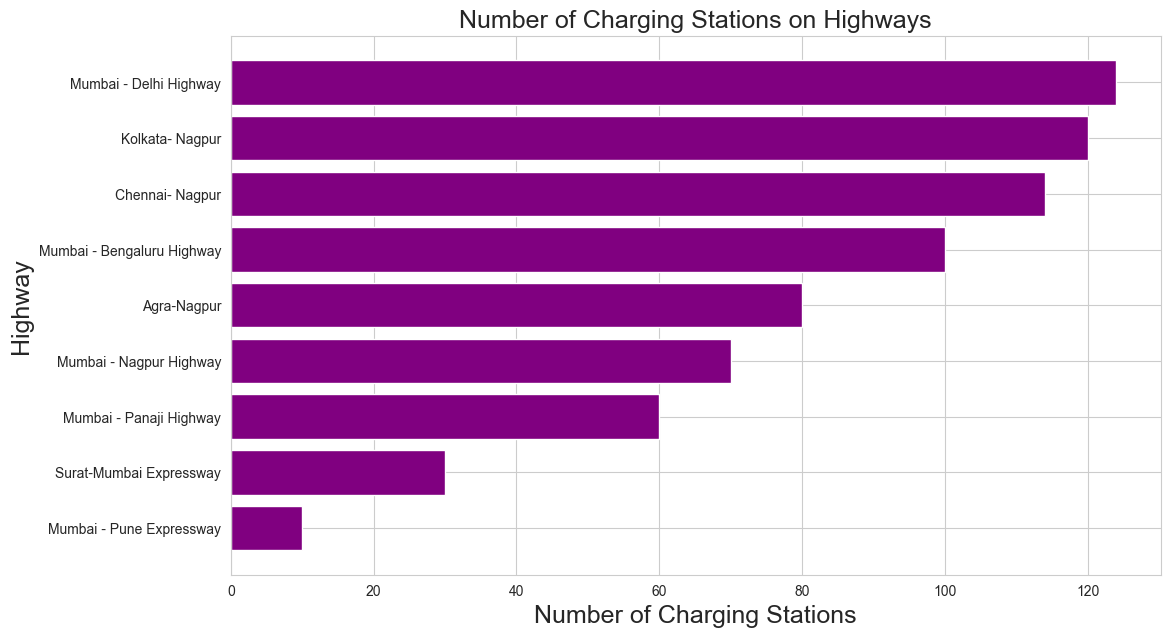

In [236]:
plot_frequency(cs_highway,"Highways/Expressways","Charging Stations", "Number of Charging Stations",
               "Highway","Number of Charging Stations on Highways",'purple')

**Based on number of charging stations, the following city / state could be targeted**

- Mumbai (Maharashtra)
- Nagpur (Maharashtra)
- Delhi
- Bengaluru (Karnataka)
- Agra (Uttar Pradesh)

# Sanctioned Charging Stations:

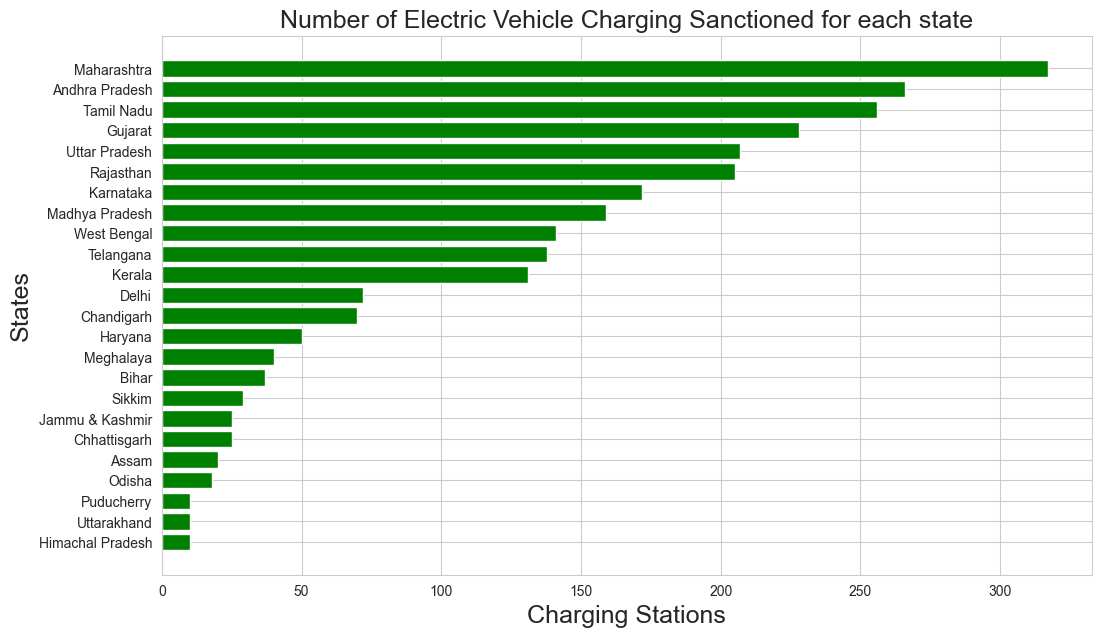

In [238]:
plot_frequency(cs_sanctioned,'State/UT-wise','Number of Electric Vehicle Charging Sanctioned','Charging Stations','States',
               'Number of Electric Vehicle Charging Sanctioned for each state','green')

**States to target based on charging stations sanctioned**

- Maharashtra
- Andhra Pradesh
- Tamil Nadu
- Gujarat
- Uttar Pradesh
- Rajasthan
- Karnataka

# Integrating data for EV of all states:

In [149]:
def get_all_data(state,state_name):
    """
    This function combines the data for electric vehicle across all states
    
    """
    data = get_data(state)
    idx = []
    for i in range(data.shape[0]):
        if data.iloc[i]['Vehicle_Class'] in imp_vehicle:
            idx.append(i)
    frame = data.iloc[idx]
    new_frame = frame.reset_index().drop(["index"], axis=1)
    new_frame["ELECTRIC(BOV)"] = [z.replace(',','') for z in new_frame["ELECTRIC(BOV)"].values]
    new_frame["ELECTRIC(BOV)"] = new_frame["ELECTRIC(BOV)"].astype(float)
    new_frame['State'] = [state_name for i in range(new_frame.shape[0])]
    return new_frame[["Vehicle_Class","ELECTRIC(BOV)","State"]]

In [150]:
# list of name of csv files of every state
data_files = ["type_AP.xlsx","type_assam.xlsx","type_bihar.xlsx","type_chandigarh.xlsx","type_chhatisgarh.xlsx",
              "type_Delhi.xlsx","type_guj.xlsx","type_haryana.xlsx","type_HP.xlsx","type_jammu.xlsx","type_karnataka.xlsx",
              "type_kerala.xlsx","type_maharashtra.xlsx","type_meghalaya.xlsx","type_MP.xlsx","type_odisha.xlsx",
              "type_puducherry.xlsx","type_rajasthan.xlsx","type_sikkim.xlsx","type_TN.xlsx","type_UP.xlsx",
              "type_uttarakhand.xlsx","type_WB.xlsx"]

In [151]:
# list of state names, these will be column values
states = ["Andhra Pradesh","Assam","Bihar","Chandigarh","Chhatisgarh","Delhi","Gujarat","Haryana","Himachal Pradesh",
         "Jammu and Kashmir","Karnataka","Kerala","Maharashtra","Meghalaya","Madhya Pradesh","Odisha","Puducherry",
          "Rajasthan","Sikkim","Tamil Nadu","Uttar Pradesh","Uttarakhand","West Bengal"]

In [152]:
import glob
data_files1 = glob.glob('*.xlsx')
data_files1

['type_haryana.xlsx',
 'type_bihar.xlsx',
 'type_uttarakhand.xlsx',
 'type_AP.xlsx',
 'type_sikkim.xlsx',
 'type_meghalaya.xlsx',
 'type_karnataka.xlsx',
 'type_maharashtra.xlsx',
 'type_kerala.xlsx',
 'type_UP.xlsx',
 'type_rajasthan.xlsx',
 'type_Delhi.xlsx',
 'type_chhatisgarh.xlsx',
 'type_TN.xlsx',
 'type_HP.xlsx',
 'type_puducherry.xlsx',
 'type_odisha.xlsx',
 'type_chandigarh.xlsx',
 'type_MP.xlsx',
 'type_guj.xlsx',
 'type_jammu.xlsx',
 'type_WB.xlsx',
 'type_assam.xlsx',
 'concatenated.xlsx']

In [153]:
frame1 = []
for file in data_files1:
    dfa = pd.read_excel(file)
    frame1.append(dfa)

In [154]:
concatenated_df = pd.concat(frame1)

In [155]:
concatenated_df.to_excel('concatenated.xlsx', index=False)

In [156]:
concatenated_df= concatenated_df[['Vehicle_Class','ELECTRIC(BOV)','State']]

In [157]:
concatenated_df

,Vehicle_Class,ELECTRIC(BOV),State
0,ADAPTED VEHICLE,0,Haryana
1,AGRICULTURAL TRACTOR,50,Haryana
2,AMBULANCE,0,Haryana
3,ANIMAL AMBULANCE,0,Haryana
4,ARMOURED/SPECIALISED VEHICLE,0,Haryana
...,...,...,...
1299,TRAILER (COMMERCIAL),390,Assam
1300,TRAILER FOR PERSONAL USE,0,Assam
1301,VEHICLE FITTED WITH COMPRESSOR,0,Assam
1302,VEHICLE FITTED WITH GENERATOR,0,Assam


In [158]:
mean_ev = concatenated_df.groupby(by = "State").mean() # group by each state and return the average number of EV being used

In [159]:
mean_ev= mean_ev.sort_values(by=['ELECTRIC(BOV)'],ascending=True)

# Average number of electric vehicles across all states

<Axes: title={'center': 'Mean of Electric Vehicles'}, ylabel='State'>

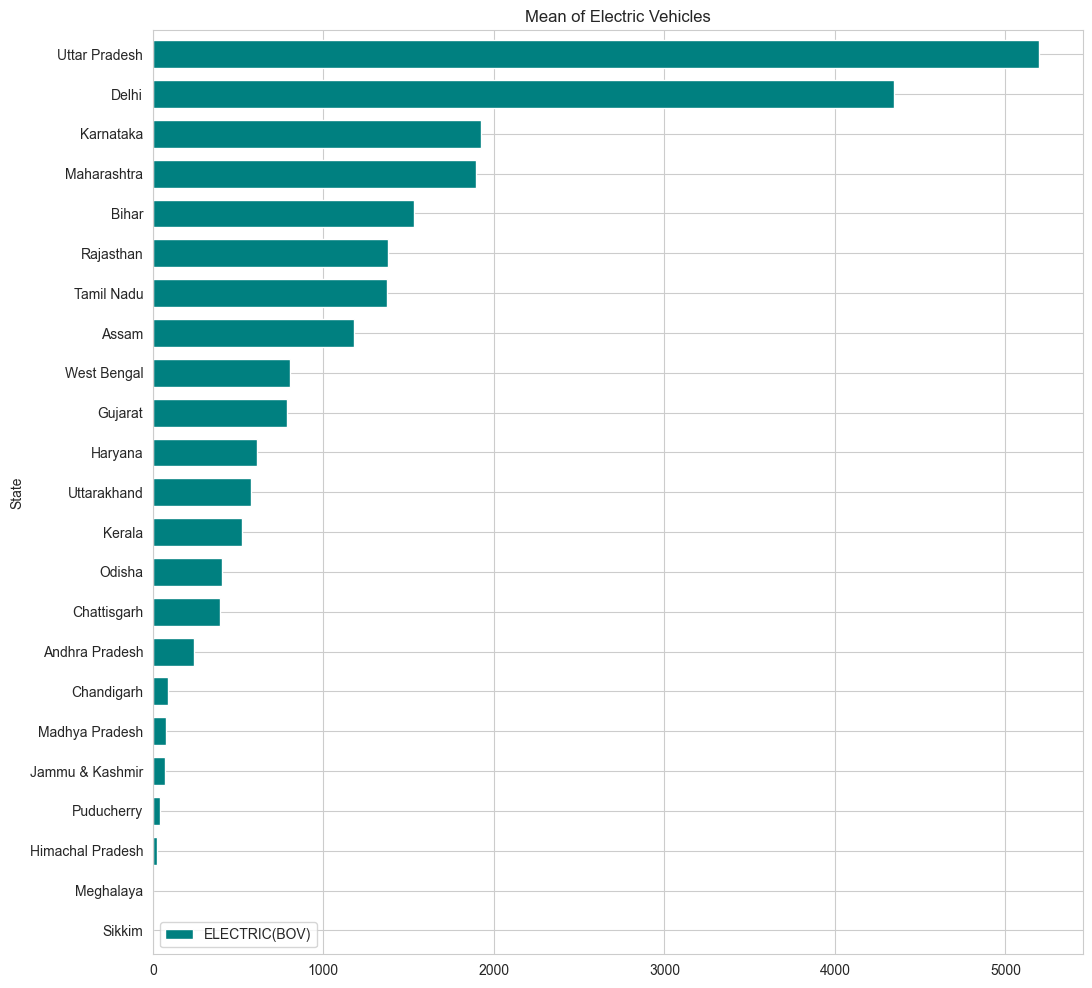

In [160]:
mean_ev.plot.barh(figsize = (12,12), width = 0.7,title = 'Mean of Electric Vehicles', color = 'teal')

**States to target :**
- Uttar Pradesh
- Delhi
- Karnataka
- Maharashtra
- Bihar
- Rajasthan
- Tamil Nadu

# Vehicle Class wise fuel data:

### Visualizing the type of fuel used for every vehicle class & which vehicle space uses Battery operated fuel (EV)

# Uttar Pradesh

In [161]:
up = pd.read_excel("type_UP.xlsx")
up = up[["Vehicle_Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]].sort_values(by=["ELECTRIC(BOV)"],ascending=False)
up = up.head(10)
up

,Vehicle_Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
19,E-RICKSHAW(P),11,45,320515,5
32,M-CYCLE/SCOOTER,65,11593,28717,31845948
20,E-RICKSHAW WITH CART (G),2,51,9273,1
44,MOTORISED CYCLE (CC > 25CC),0,3,1491,65798
55,THREE WHEELER (PASSENGER),74001,297699,1410,24915
9,BUS,13484,93406,576,83
38,MOPED,1,213,555,1125365
40,MOTOR CAR,2169,1500358,483,1993210
54,THREE WHEELER (GOODS),10613,86192,354,5293
1,AGRICULTURAL TRACTOR,11,1844663,94,2740


<Axes: ylabel='Vehicle_Class'>

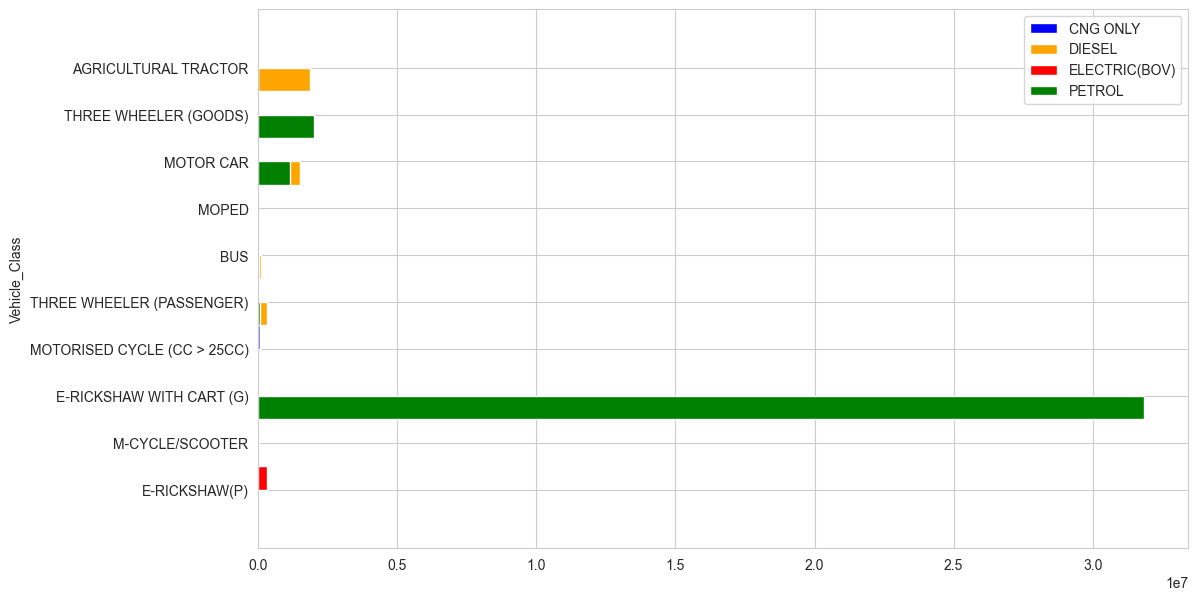

In [162]:
up.plot.barh(x = 'Vehicle_Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 2.0)

- **The above shows all the types of fuels used for various vehicle.**

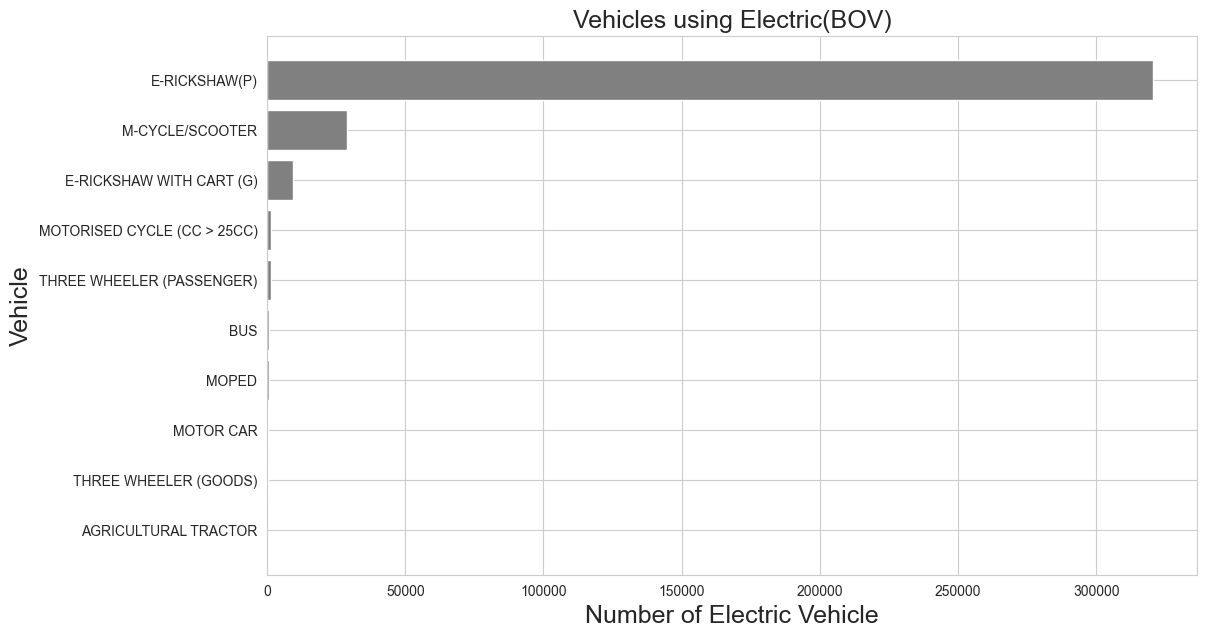

In [163]:
plot_frequency(up,'Vehicle_Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

- **For the Uttar Pradesh state, the above shows which vehicle space to target when it comes to EV(Battery operated vehicle).**

# Delhi

In [177]:
dl = pd.read_excel("type_Delhi.xlsx")
dl = dl[["Vehicle_Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]].sort_values(by=["ELECTRIC(BOV)"],ascending=False)
dl = dl.head(10)
dl

,Vehicle_Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
11,E-RICKSHAW(P),0,0,108765,0
19,M-CYCLE/SCOOTER,2,205,33767,8538623
12,E-RICKSHAW WITH CART (G),0,0,10698,0
25,MOTOR CAR,5357,699355,4663,2570696
33,THREE WHEELER (GOODS),59109,1,3227,0
24,MOTOR CAB,16411,50433,2938,9498
34,THREE WHEELER (PASSENGER),31424,528,480,71321
5,BUS,33371,29099,329,10
23,MOPED,0,13,259,128828
15,GOODS CARRIER,151174,160757,50,20043


<Axes: ylabel='Vehicle_Class'>

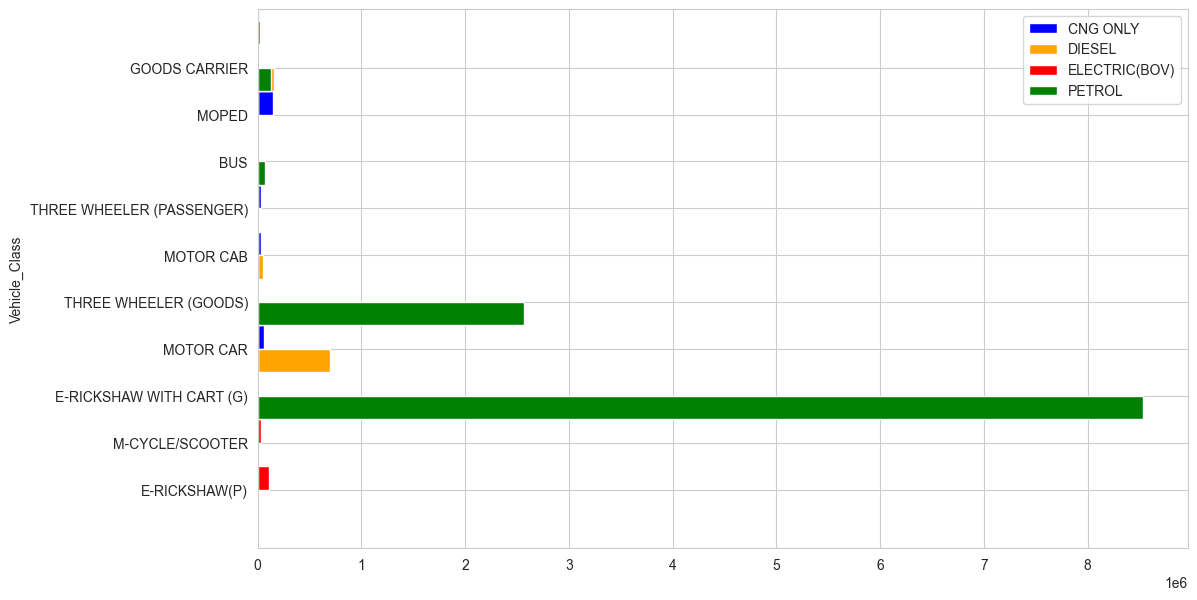

In [178]:
dl.plot.barh(x = 'Vehicle_Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 2.0)

- **The above shows all the types of fuels used for various vehicle.**

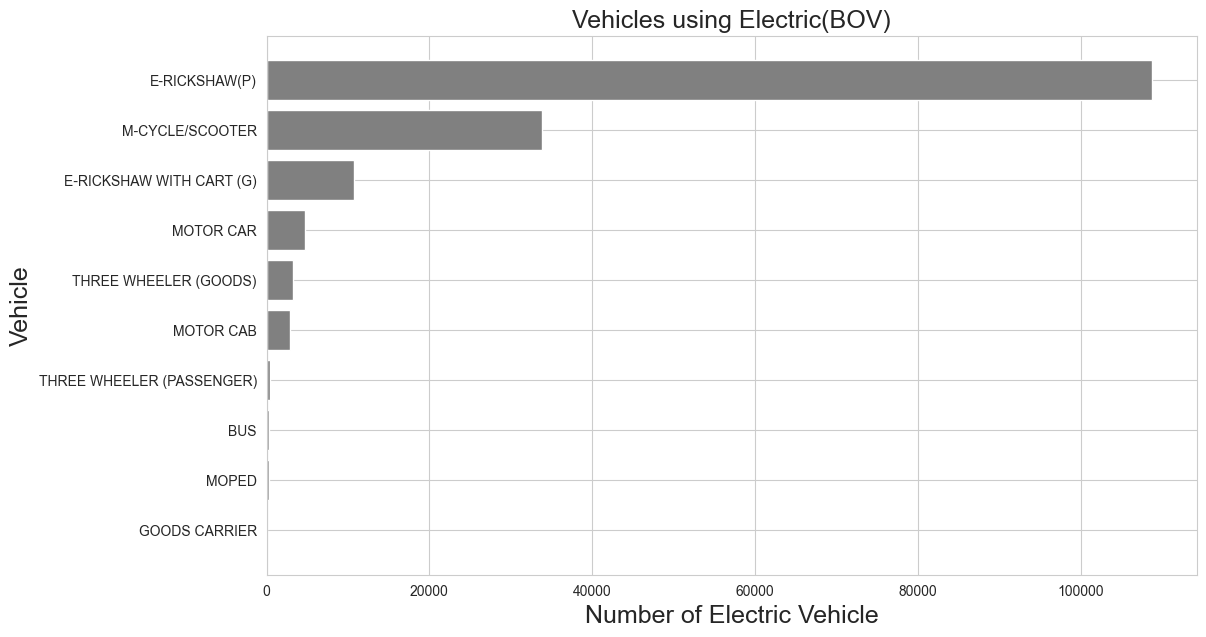

In [179]:
plot_frequency(dl,'Vehicle_Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

- **For Delhi, the above shows which vehicle space to target when it comes to EV(Battery operated vehicle).**

# Karnataka

In [181]:
ka = pd.read_excel("type_karnataka.xlsx")
ka = ka[["Vehicle_Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]].sort_values(by=["ELECTRIC(BOV)"],ascending=False)
ka = ka.head(15)
ka

,Vehicle_Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
31,M-CYCLE/SCOOTER,4,26858,89417,19344321
56,THREE WHEELER (PASSENGER),7253,143101,14740,221671
38,MOTOR CAR,90,1330542,8871,2508818
40,MOTOR CYCLE/SCOOTER-USED FOR HIRE,0,5,8684,21812
36,MOPED,1,644,4072,741716
55,THREE WHEELER (GOODS),912,187114,2500,15829
42,MOTORISED CYCLE (CC > 25CC),0,0,2444,29541
37,MOTOR CAB,90,284456,1750,27734
19,E-RICKSHAW WITH CART (G),0,8,802,0
18,E-RICKSHAW(P),0,8,482,13


<Axes: ylabel='Vehicle_Class'>

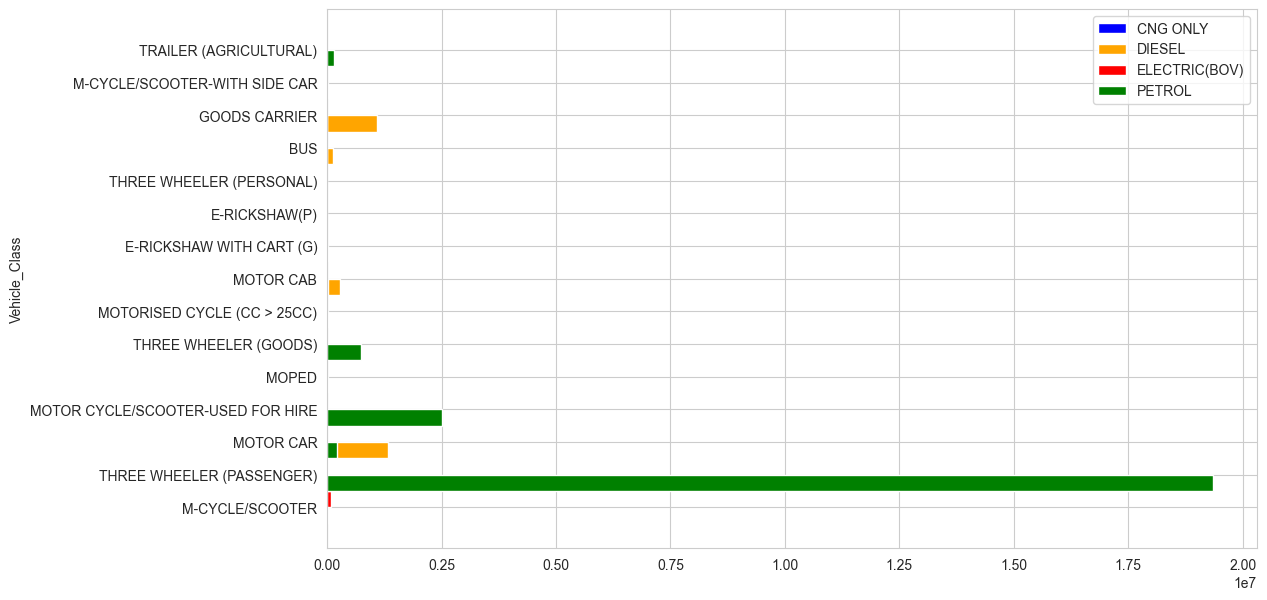

In [183]:
ka.plot.barh(x = 'Vehicle_Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 2.0)

- **The above shows all the types of fuels used for various vehicle.**

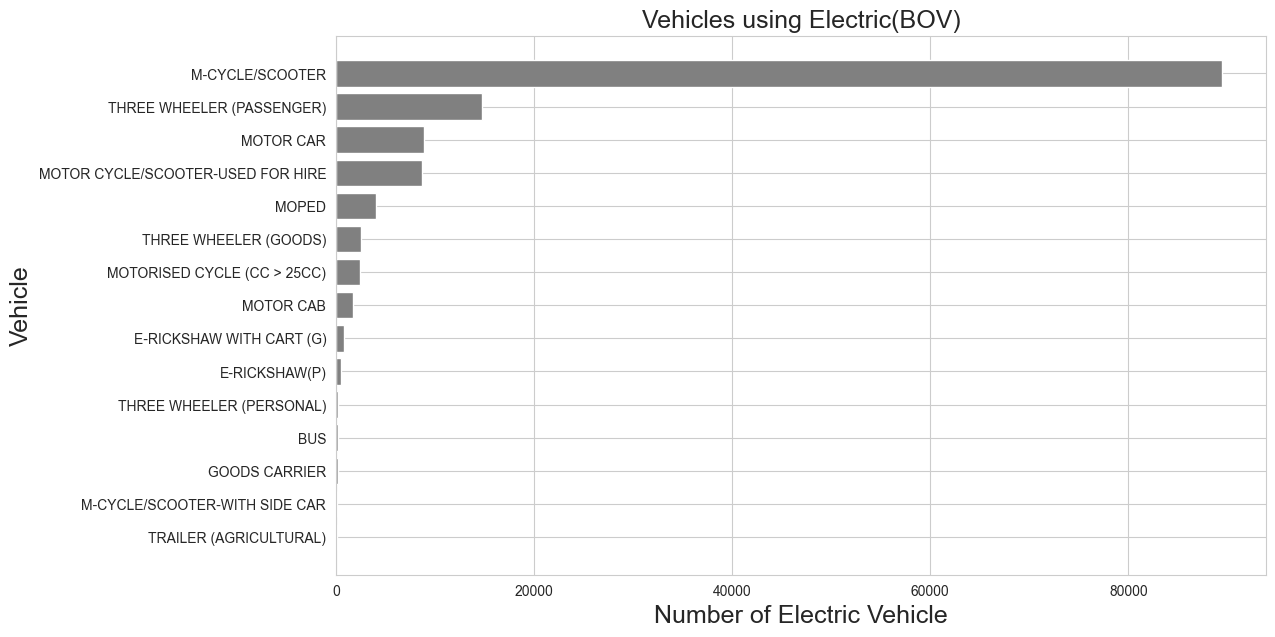

In [184]:
plot_frequency(ka,'Vehicle_Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

- **For the Karnataka state, the above shows which vehicle space to target when it comes to EV(Battery operated vehicle).**

# Maharashtra

In [187]:
mh = pd.read_excel("type_maharashtra.xlsx")
mh = mh[["Vehicle_Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]].sort_values(by=["ELECTRIC(BOV)"],ascending=False)
mh = mh.head(12)
mh

,Vehicle_Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
31,M-CYCLE/SCOOTER,0,5537,106327,22876524
39,MOTOR CAR,1094,1971766,12609,2682375
18,E-RICKSHAW(P),0,30,6020,108
37,MOPED,0,26,4092,239116
19,E-RICKSHAW WITH CART (G),0,0,2132,0
8,BUS,7515,109628,1116,1916
55,THREE WHEELER (GOODS),6987,74826,912,563
38,MOTOR CAB,1542,149928,798,10683
56,THREE WHEELER (PASSENGER),42348,33751,310,134869
43,MOTORISED CYCLE (CC > 25CC),0,6,70,28322


<Axes: ylabel='Vehicle_Class'>

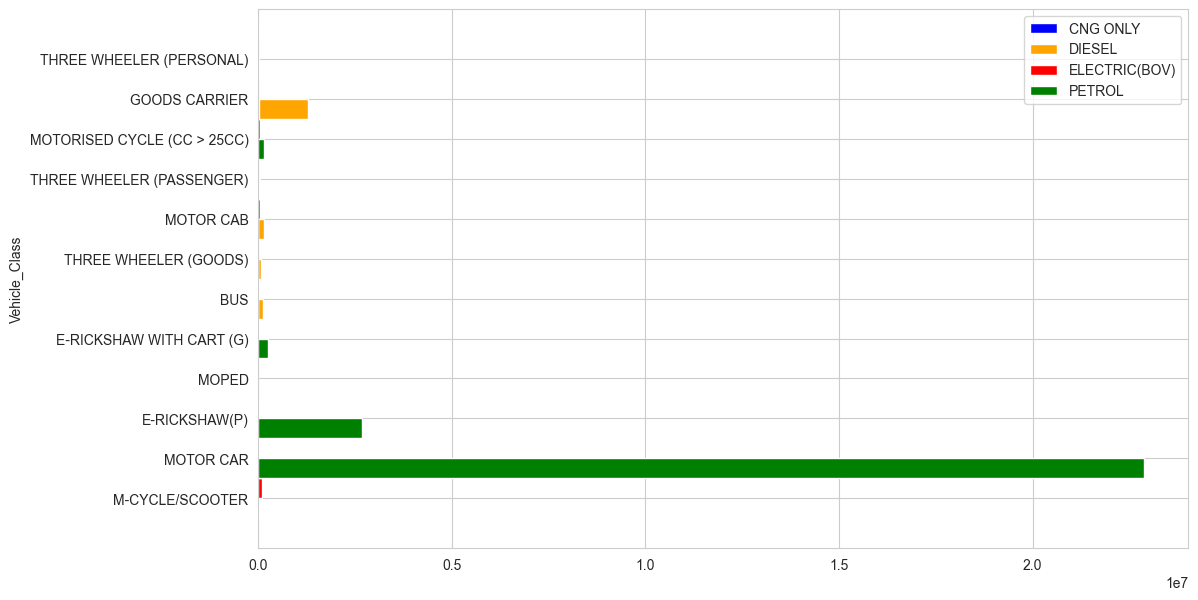

In [194]:
mh.plot.barh(x = 'Vehicle_Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 2.0)

- **The above shows all the types of fuels used for various vehicle.**

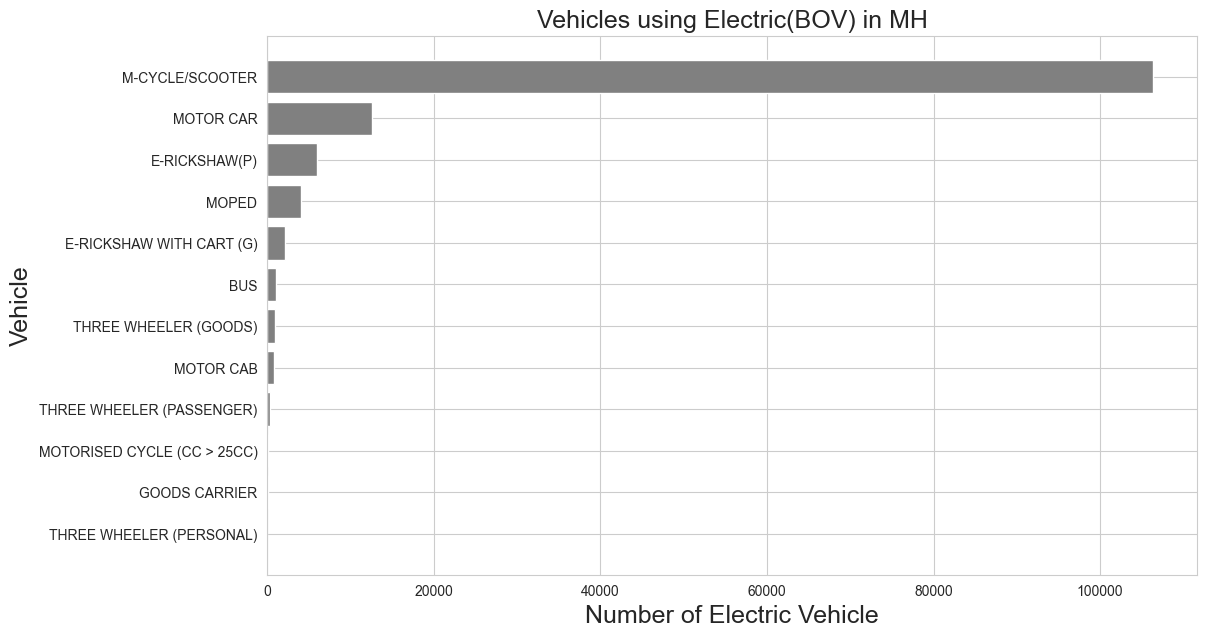

In [189]:
plot_frequency(mh,'Vehicle_Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV) in MH','grey')

- **For the maharashtra state, the above shows which vehicle space to target when it comes to EV(Battery operated vehicle).**

# Bihar

In [192]:
bh = pd.read_excel("type_bihar.xlsx")
bh = bh[["Vehicle_Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]].sort_values(by=["ELECTRIC(BOV)"],ascending=False)
bh = bh.head(12)
bh

,Vehicle_Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
15,E-RICKSHAW(P),1,120,78674,7
27,M-CYCLE/SCOOTER,25,2809,9811,8222573
16,E-RICKSHAW WITH CART (G),0,6,1473,0
48,THREE WHEELER (PASSENGER),17412,364290,1064,8139
34,MOTOR CAR,60,238322,194,367879
55,TRAILER (COMMERCIAL),6,70144,163,508
32,MOPED,0,38,143,87858
47,THREE WHEELER (GOODS),779,49488,111,274
38,MOTORISED CYCLE (CC > 25CC),0,2,50,3520
6,BUS,183,40500,27,123


<Axes: ylabel='Vehicle_Class'>

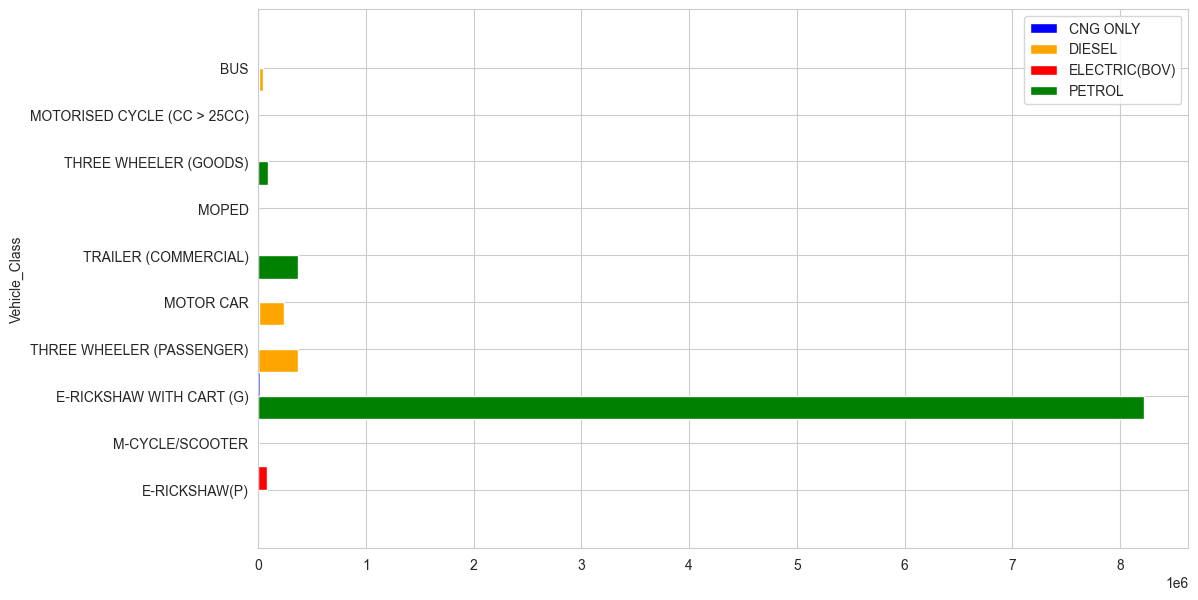

In [191]:
bh.plot.barh(x = 'Vehicle_Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 2.0)

- **The above shows all the types of fuels used for various vehicle.**

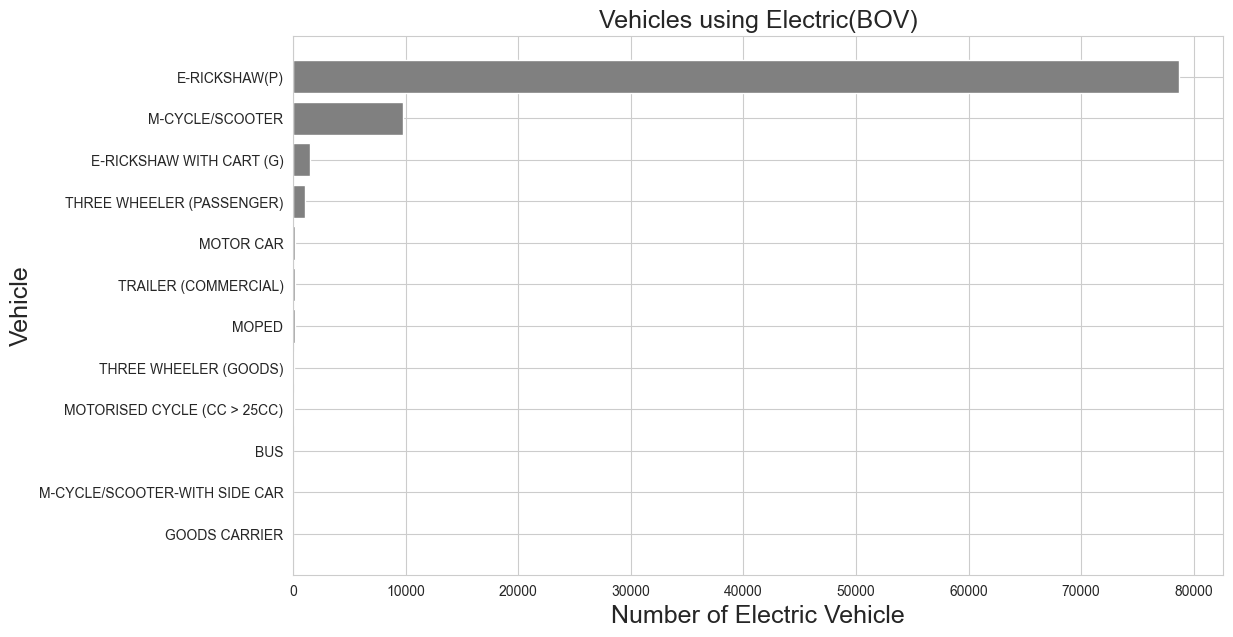

In [193]:
plot_frequency(bh,'Vehicle_Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

- **For the Bihar state, the above shows which vehicle space to target when it comes to EV(Battery operated vehicle).**

# Rajasthan

In [195]:
rj = pd.read_excel("type_rajasthan.xlsx")
rj = rj[["Vehicle_Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]].sort_values(by=["ELECTRIC(BOV)"],ascending=False)
rj = rj.head(12)
rj

,Vehicle_Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
31,M-CYCLE/SCOOTER,1,2428,44777,12382954
18,E-RICKSHAW(P),0,98,35836,3
19,E-RICKSHAW WITH CART (G),0,20,5534,0
36,MOPED,0,38,2923,206887
38,MOTOR CAR,40,889434,1595,1062900
42,MOTORISED CYCLE (CC > 25CC),0,4,1201,173161
51,THREE WHEELER (GOODS),1057,45623,336,297
52,THREE WHEELER (PASSENGER),5913,134633,116,3229
40,MOTOR CYCLE/SCOOTER-USED FOR HIRE,0,7,59,15960
1,AGRICULTURAL TRACTOR,0,1227233,39,353


<Axes: ylabel='Vehicle_Class'>

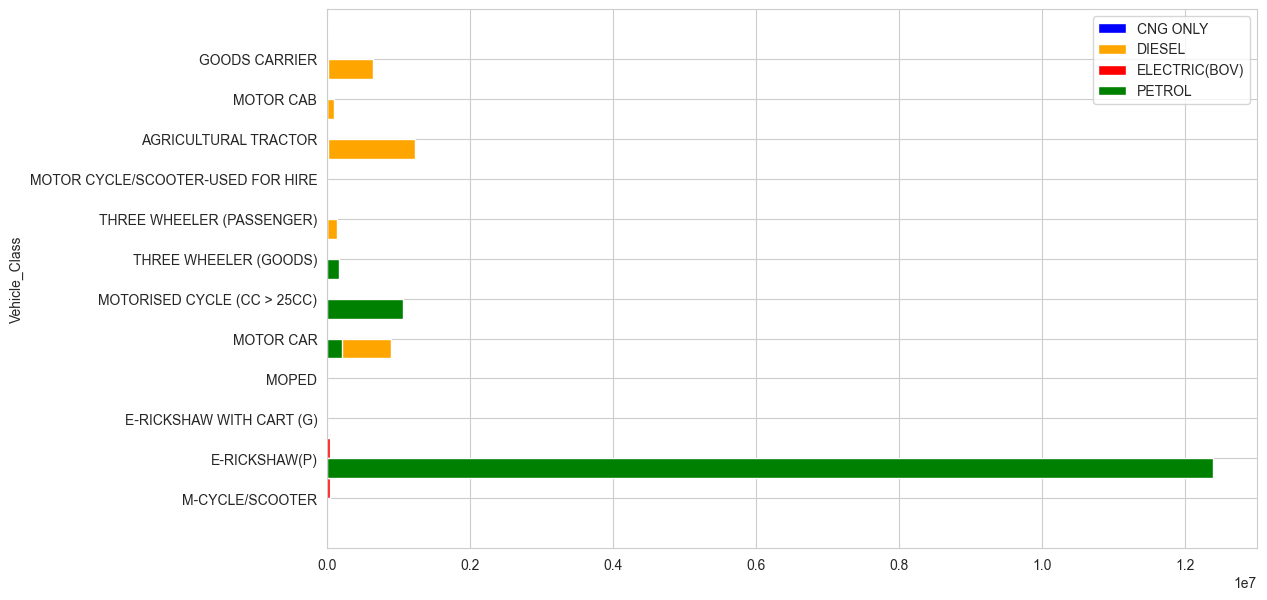

In [196]:
rj.plot.barh(x = 'Vehicle_Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 2.0)

- **The above shows all the types of fuels used for various vehicle.**

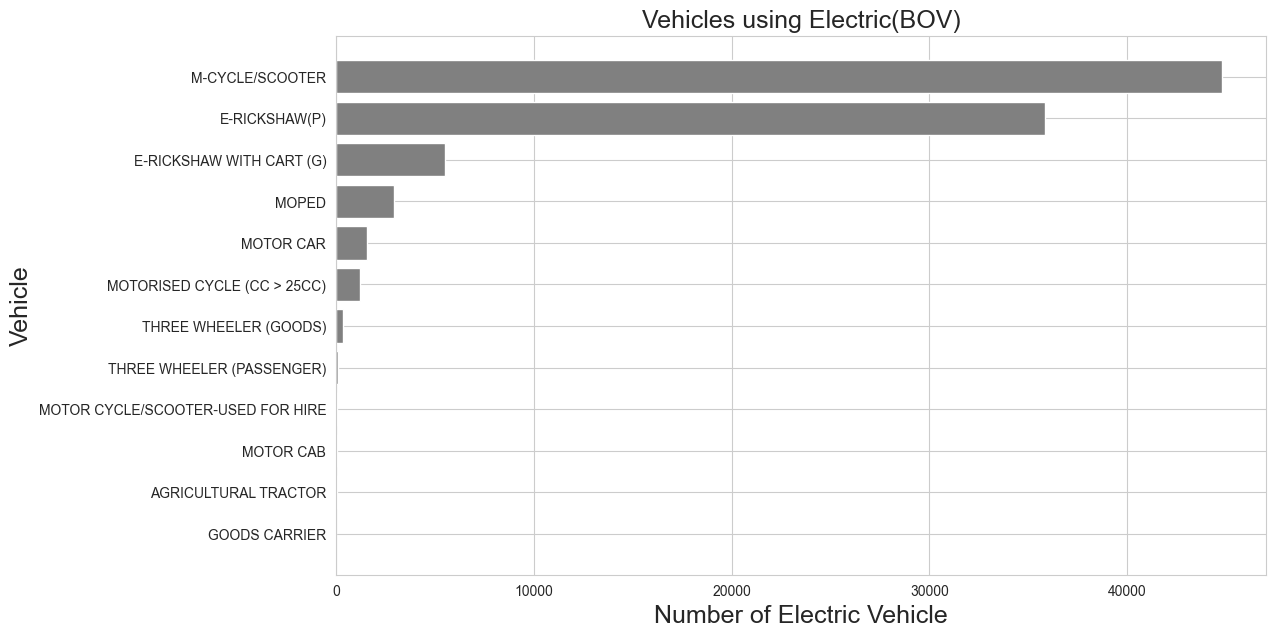

In [197]:
plot_frequency(rj,'Vehicle_Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

- **For the Bihar state, the above shows which vehicle space to target when it comes to EV(Battery operated vehicle).**

# Tamil Nadu

In [205]:
tn = pd.read_excel("type_TN.xlsx")
tn = tn[["Vehicle_Class","CNG ONLY","DIESEL","ELECTRIC(BOV)","PETROL"]].sort_values(by=["ELECTRIC(BOV)"],ascending=False)
tn = tn.head(15)
tn

,Vehicle_Class,CNG ONLY,DIESEL,ELECTRIC(BOV),PETROL
32,M-CYCLE/SCOOTER,0,32272,64538,20531741
43,MOTORISED CYCLE (CC > 25CC),1,46,8410,252813
37,MOPED,0,1462,6172,2675074
20,E-RICKSHAW WITH CART (G),0,0,3589,0
39,MOTOR CAR,6,1367721,3581,1776362
53,THREE WHEELER (GOODS),280,50998,2820,2418
26,GOODS CARRIER,2545,1299390,1457,25851
60,TRAILER (AGRICULTURAL),2,16159,1023,1892
1,AGRICULTURAL TRACTOR,0,429024,390,2282
11,CAMPER VAN / TRAILER (PRIVATE USE),0,4963,332,634


<Axes: ylabel='Vehicle_Class'>

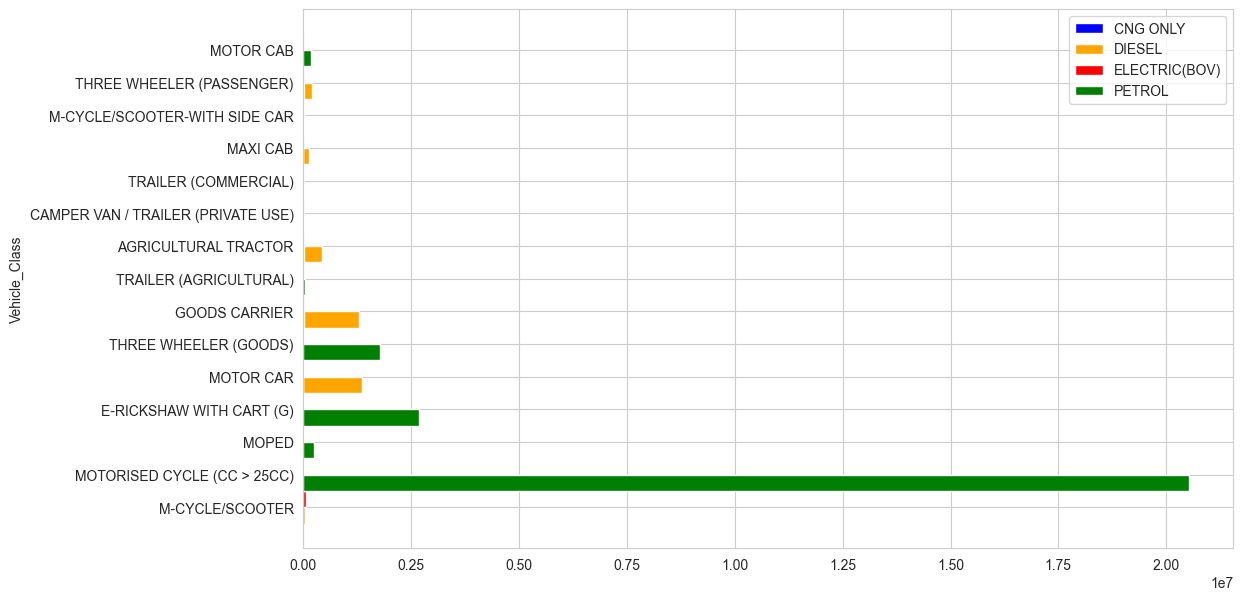

In [206]:
tn.plot.barh(x = 'Vehicle_Class', color=("blue", "orange", "red", "green"), figsize = (12,7), width = 2.0)

- **The above shows all the types of fuels used for various vehicle.**

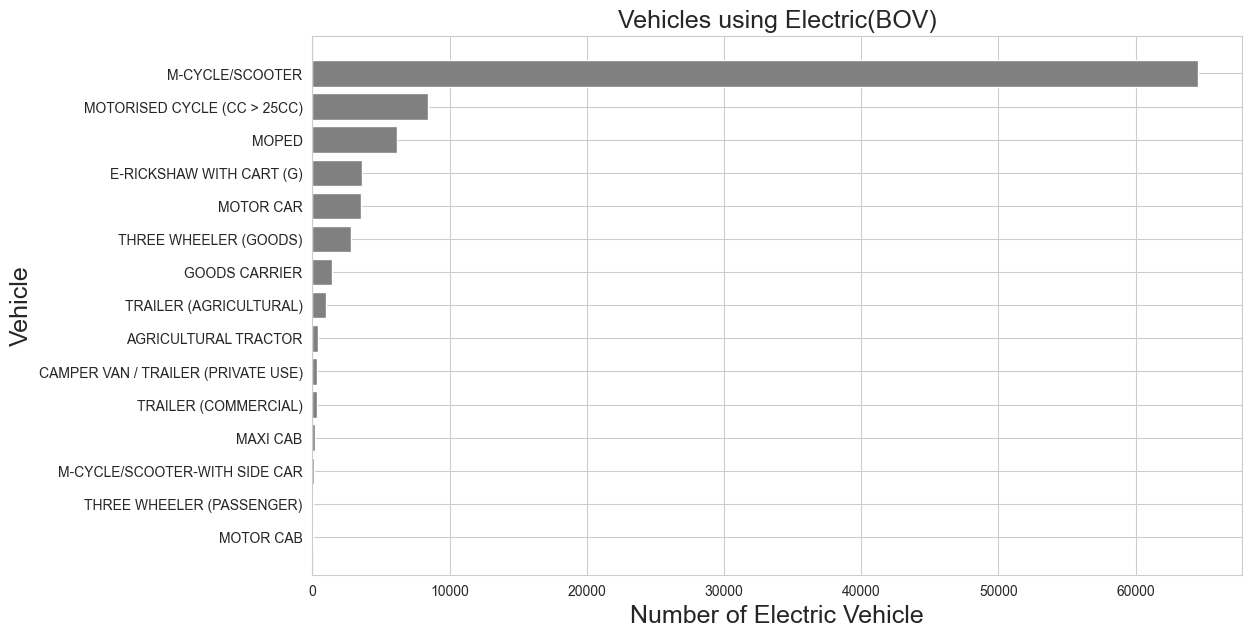

In [207]:
plot_frequency(tn,'Vehicle_Class', 'ELECTRIC(BOV)','Number of Electric Vehicle','Vehicle','Vehicles using Electric(BOV)','grey')

- **For the Tamil Nadu state, the above shows which vehicle space to target when it comes to EV(Battery operated vehicle).**

# Number of EV in India:

In [209]:
# The following code helps to show various insights on Indian map

fp = r'/Users/manjunathkannavalli/Downloads/Feynn Labs_EV-market_geo segmentation/India Shape/india_st.shp'
map_df = gpd.read_file(fp) 
map_df_copy = gpd.read_file(fp)

In [224]:
map_df['STATE'] = map_df['STATE'].astype(str).str.capitalize()
map_df.head()

,STATE,geometry
0,Andaman and nicobar islands,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."
1,Andhra pradesh,"POLYGON ((82.00063 17.95354, 82.11718 18.02457..."
2,Arunachal pradesh,"POLYGON ((95.61476 27.34745, 95.69234 27.33888..."
3,Assam,"POLYGON ((92.82207 25.57781, 92.69672 25.61368..."
4,Bihar,"POLYGON ((84.16946 26.28322, 83.91399 26.38523..."


In [212]:
mean_ev.to_csv('mean.csv')

In [213]:
mm = pd.read_csv("mean.csv")

In [225]:
mm['State'] = mm['State'].astype(str).str.capitalize()
mm.head() # this dataframe contains all states and the corresponding average number of EV being used

,State,ELECTRIC(BOV)
0,Sikkim,0.777778
1,Meghalaya,1.229167
2,Himachal pradesh,21.816667
3,Puducherry,42.740741
4,Jammu & kashmir,69.767857


In [226]:
merged = map_df.set_index('STATE').join(mm.set_index('State')) # merging the above 2 dataframes

In [227]:
merged.tail()

,geometry,ELECTRIC(BOV)
STATE,,
Sikkim,"POLYGON ((88.56641 27.15513, 88.49880 27.08899...",0.777778
Tamil nadu,"POLYGON ((77.21558 10.07937, 77.24069 10.15721...",1371.338235
Tripura,"POLYGON ((91.88086 23.70280, 91.82317 23.72246...",NaN
Uttar pradesh,"POLYGON ((77.64511 27.19158, 77.58933 27.17956...",5194.485714
West bengal,"POLYGON ((88.79024 24.02921, 88.83876 23.95037...",801.272727


In [228]:
# The states for which there is no data available for EV, we are assuming the number to be (0) there.
merged['ELECTRIC(BOV)'] = merged['ELECTRIC(BOV)'].replace(np.nan, 0)
merged.head()

,geometry,ELECTRIC(BOV)
STATE,,
Andaman and nicobar islands,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",0.000000
Andhra pradesh,"POLYGON ((82.00063 17.95354, 82.11718 18.02457...",239.345455
Arunachal pradesh,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",0.000000
Assam,"POLYGON ((92.82207 25.57781, 92.69672 25.61368...",1180.016667
Bihar,"POLYGON ((84.16946 26.28322, 83.91399 26.38523...",1529.566667


<Axes: title={'center': 'Average number of EV in India'}>

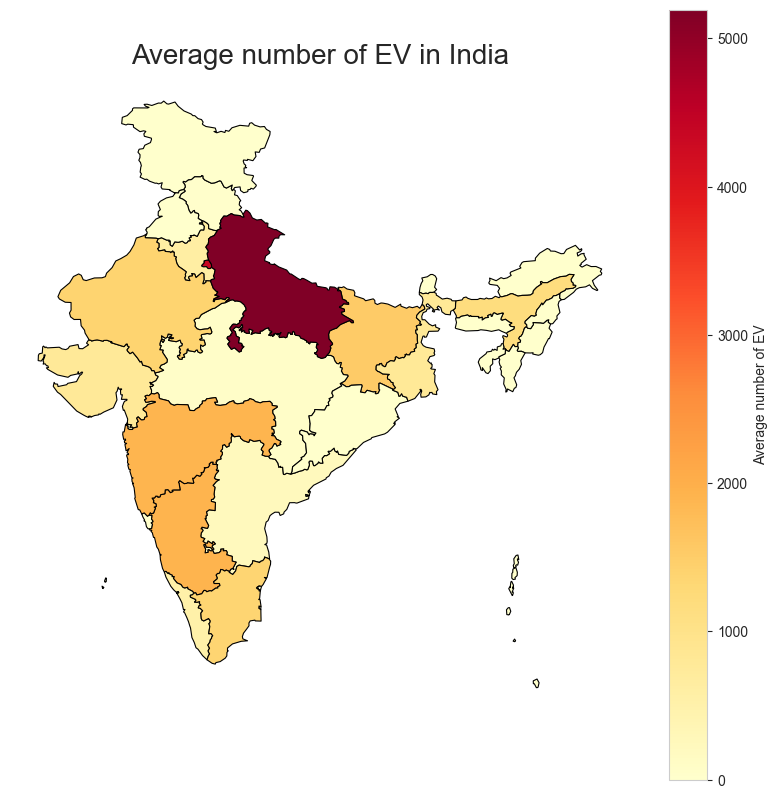

In [230]:
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Average number of EV in India', fontdict={'fontsize': '20', 'fontweight' : '10'})

merged.plot(column='ELECTRIC(BOV)',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Average number of EV"})

# Charging Stations Sanctioned:

<Axes: title={'center': 'Number of Charging Stations sanctioned in India'}>

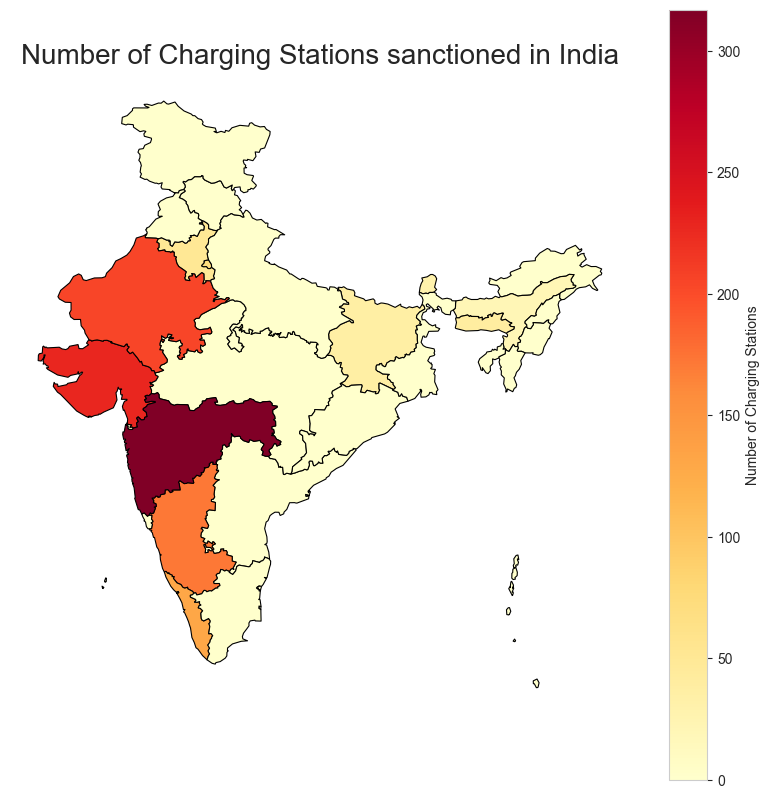

In [229]:
merged_new = map_df.set_index('STATE').join(cs_sanctioned.set_index('State/UT-wise'))
merged_new['Number of Electric Vehicle Charging Sanctioned'] = merged_new['Number of Electric Vehicle Charging Sanctioned'].replace(np.nan, 0)

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Number of Charging Stations sanctioned in India', fontdict={'fontsize': '20', 'fontweight' : '10'})

merged_new.plot(column='Number of Electric Vehicle Charging Sanctioned',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0',legend=True,markersize=[39.739192, -104.990337], legend_kwds={'label': "Number of Charging Stations"})

- The above plots also confirm the same states which were intially planned to target.

# Resources for datasets used:

- https://data.gov.in/
- https://en.wikipedia.org/wiki/Indian_states_ranking_by_number_of_vehicles#cite_note-2
- https://vahan.parivahan.gov.in/vahan4dashboard/vahan/view/reportview.xhtml
- https://www.kaggle.com/datasets?search=+EV+market+data